In [1]:
import json
import plotly.graph_objects as go
import pandas as pd

with open('structures.json', 'r') as f:
    data = json.load(f)

df = pd.read_csv('percent_change.csv')


In [5]:
df

,acronym,change
0,root,102.328671
1,grey,99.894702
2,CH,101.749670
3,CTX,94.843476
4,CTXpl,94.511870
...,...,...
1322,ipf,NaN
1323,pms,NaN
1324,pfs,NaN
1325,IPF,NaN


In [4]:
labels = [item['acronym'] for item in data]

parents = ['' if len(item['structure_id_path']) == 1 else next((i['acronym'] for i in data if i['id'] == item['structure_id_path'][-2])) for item in data]

change = [df.loc[df['acronym'] == acronym, 'change'].iloc[0] if acronym in df['acronym'].values else None for acronym in labels]
colors = ['rgb{}'.format(tuple(item['rgb_triplet'])) for item in data]


In [ ]:
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=change,
    marker=dict(colors=colors),
    hovertemplate='<b>%{label}</b><br>density (cells/mm^3): %{value}<extra></extra>',
))


In [ ]:
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    margin=dict(t=0, l=0, r=0, b=0),
)

fig.show()

In [8]:
fig.show()


In [6]:
import json
import plotly.graph_objects as go
import pandas as pd

# Load the JSON file
with open('structures.json', 'r') as f:
    data = json.load(f)

# Read the CSV file
df = pd.read_csv('percent_change.csv')

# Prepare data for the tree
labels = [item['acronym'] for item in data]

parents = ['' if len(item['structure_id_path']) == 1 else next((i['acronym'] for i in data if i['id'] == item['structure_id_path'][-2])) for item in data]

# Match acronyms with count values from the CSV
change = [df.loc[df['acronym'] == acronym, 'change'].iloc[0] if acronym in df['acronym'].values else None for acronym in labels]

colors = ['rgb{}'.format(tuple(item['rgb_triplet'])) for item in data]

# Create a Plotly figure
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=change,  # Assign count values to the sunburst
    marker=dict(colors=colors),
    hovertemplate='<b>%{label}</b><br>Percent Change: %{value}<extra></extra>',  # Customize hover text
))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()


In [28]:
import json
import plotly.graph_objects as go
import pandas as pd

# Load the JSON file
with open('structures.json', 'r') as f:
    data = json.load(f)

# Read the CSV file
df = pd.read_csv('percent_change.csv')

# Prepare data for the tree
labels = [item['acronym'] for item in data]
parents = ['' if len(item['structure_id_path']) == 1 else next((i['acronym'] for i in data if i['id'] == item['structure_id_path'][-2])) for item in data]

# Match acronyms with count values from the CSV
changes = [df.loc[df['acronym'] == acronym, 'change'].iloc[0] if acronym in df['acronym'].values else None for acronym in labels]

colors = ['rgb{}'.format(tuple(item['rgb_triplet'])) for item in data]

# Create a Plotly figure
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=changes,  # Assign count values to the sunburst
    marker=dict(colors=colors),
    hovertemplate='<b>%{label}</b><br>Count: %{value}<extra></extra>',  # Customize hover text
))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()


In [7]:
import json
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Load the JSON file
with open('structures.json', 'r') as f:
    data = json.load(f)

# Read the CSV file
df = pd.read_csv('percent_change.csv')

# Prepare data for the tree
labels = [item['acronym'] for item in data]
parents = ['' if len(item['structure_id_path']) == 1 else next((i['acronym'] for i in data if i['id'] == item['structure_id_path'][-2])) for item in data]

# Match acronyms with change values from the CSV, and apply the absolute function
changes = [abs(df.loc[df['acronym'] == acronym, 'change'].iloc[0]) if acronym in df['acronym'].values else np.nan for acronym in labels]

# Replace NaN values with a default value
default_value = 0.0
changes = [default_value if pd.isnull(change) else change for change in changes]

colors = ['rgb{}'.format(tuple(item['rgb_triplet'])) for item in data]

# Create a Plotly figure
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=changes,
    marker=dict(colors=colors),
    hovertemplate='<b>%{label}</b><br>Percent Change: %{value}<extra></extra>',  # Customize hover text
))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()


In [11]:
print(parents)


['', 'root', 'grey', 'CH', 'CTX', 'CTXpl', 'Isocortex', 'FRP', 'FRP', 'FRP', 'FRP', 'FRP', 'Isocortex', 'MO', 'MO', 'MO', 'MO', 'MO', 'MO', 'MOp', 'MOp', 'MOp', 'MOp', 'MOp', 'MO', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'Isocortex', 'SS', 'SS', 'SS', 'SS', 'SS', 'SS', 'SS', 'SSp', 'SSp', 'SSp', 'SSp', 'SSp', 'SSp', 'SSp', 'SSp-n', 'SSp-n', 'SSp-n', 'SSp-n', 'SSp-n', 'SSp-n', 'SSp', 'SSp-bfd', 'SSp-bfd', 'SSp-bfd', 'SSp-bfd', 'SSp-bfd', 'SSp-bfd', 'SSp-bfd', 'VISrll', 'VISrll', 'VISrll', 'VISrll', 'VISrll', 'VISrll', 'SSp', 'SSp-ll', 'SSp-ll', 'SSp-ll', 'SSp-ll', 'SSp-ll', 'SSp-ll', 'SSp', 'SSp-m', 'SSp-m', 'SSp-m', 'SSp-m', 'SSp-m', 'SSp-m', 'SSp', 'SSp-ul', 'SSp-ul', 'SSp-ul', 'SSp-ul', 'SSp-ul', 'SSp-ul', 'SSp', 'SSp-tr', 'SSp-tr', 'SSp-tr', 'SSp-tr', 'SSp-tr', 'SSp-tr', 'SSp', 'SSp-un', 'SSp-un', 'SSp-un', 'SSp-un', 'SSp-un', 'SSp-un', 'SS', 'SSs', 'SSs', 'SSs', 'SSs', 'SSs', 'SSs', 'Isocortex', 'GU', 'GU', 'GU', 'GU', 'GU', 'GU', 'Isocortex', 'VISC', 'VISC', 'VISC', 'VISC', 'VISC', 'VI

In [13]:
import pandas as pd
import numpy as np

# Read both datasets
df1 = pd.read_csv('Fed.csv')
df2 = pd.read_csv('FastRefeed.csv')

# Rename the density column in both datasets for clarity
df1.rename(columns={'density (cells/mm^3)': 'density_Fed'}, inplace=True)
df2.rename(columns={'density (cells/mm^3)': 'density_FastRefeed'}, inplace=True)

# Merge the two datasets on 'acronym' column
df = pd.merge(df1, df2, on='acronym', how='outer')  # 'outer' ensures that all acronyms from both datasets are included

# Calculate the ratio
df['density_ratio'] = df['density_FastRefeed'] / df['density_Fed']

# Handle any potential division by zero or infinity
df['density_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with a default value, if needed
default_value = 1.0
df['density_ratio'].fillna(default_value, inplace=True)


In [14]:
df

,acronym,name_x,count_x,density_Fed,name_y,count_y,density_FastRefeed,density_ratio
0,AAA,Anterior amygdalar area,1074.0,4340.215950,Anterior amygdalar area,2009.0,8118.709352,1.870577
1,ACA,Anterior cingulate area,32582.0,11696.871109,Anterior cingulate area,45796.5,16440.849479,1.405577
2,ACAd,"Anterior cingulate area, dorsal part",16173.5,10279.596802,"Anterior cingulate area, dorsal part",23769.0,15107.165202,1.469626
3,ACAd1,"Anterior cingulate area, dorsal part, layer 1",1353.0,4418.635505,"Anterior cingulate area, dorsal part, layer 1",3579.0,11688.319641,2.645233
4,ACAd2/3,"Anterior cingulate area, dorsal part, layer 2/3",4351.5,14184.374045,"Anterior cingulate area, dorsal part, layer 2/3",6132.5,19989.813589,1.409284
...,...,...,...,...,...,...,...,...
834,vhc,ventral hippocampal commissure,45.0,1347.053321,ventral hippocampal commissure,40.5,1212.347989,0.900000
835,von,vomeronasal nerve,96.5,14463.700234,vomeronasal nerve,14.0,2098.360656,0.145078
836,vtd,ventral tegmental decussation,131.0,6906.095552,ventral tegmental decussation,117.5,6194.398682,0.896947
837,x,Nucleus x,106.5,3742.998353,Nucleus x,196.5,6906.095552,1.845070


In [15]:
import pandas as pd
import json
import numpy as np
import plotly.graph_objects as go

# Read both datasets
df1 = pd.read_csv('Fed.csv')
df2 = pd.read_csv('FastRefeed.csv')

# Rename the density column in both datasets for clarity
df1.rename(columns={'density (cells/mm^3)': 'density_Fed'}, inplace=True)
df2.rename(columns={'density (cells/mm^3)': 'density_FastRefeed'}, inplace=True)

# Merge the two datasets on 'acronym' column
df = pd.merge(df1, df2, on='acronym', how='outer')  # 'outer' ensures that all acronyms from both datasets are included

# Calculate the ratio
df['density_ratio'] = df['density_FastRefeed'] / df['density_Fed']

# Handle any potential division by zero or infinity
df['density_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with a default value, if needed
default_value = 1.0
df['density_ratio'].fillna(default_value, inplace=True)

# Load the JSON file
with open('structures.json', 'r') as f:
    data = json.load(f)

# Prepare data for the tree
labels = [item['acronym'] for item in data]
parents = ['' if len(item['structure_id_path']) == 1 else next((i['acronym'] for i in data if i['id'] == item['structure_id_path'][-2])) for item in data]

# Match acronyms with ratio values from the merged DataFrame
ratios = [df.loc[df['acronym'] == acronym, 'density_ratio'].iloc[0] if acronym in df['acronym'].values else default_value for acronym in labels]

colors = ['rgb{}'.format(tuple(item['rgb_triplet'])) for item in data]

# Create a Plotly figure
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=ratios,
    marker=dict(colors=colors),
    hovertemplate='<b>%{label}</b><br>Density Ratio (FastRefeed/Fed): %{value}<extra></extra>',  # Customize hover text
))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()


In [2]:
import pandas as pd
import json
import numpy as np
import plotly.graph_objects as go

# Read both datasets
df1 = pd.read_csv('Fed.csv')
df2 = pd.read_csv('FastRefeed.csv')

# Rename the density column in both datasets for clarity
df1.rename(columns={'density (cells/mm^3)': 'density_Fed'}, inplace=True)
df2.rename(columns={'density (cells/mm^3)': 'density_FastRefeed'}, inplace=True)

# Merge the two datasets on 'acronym' column
df = pd.merge(df1, df2, on='acronym', how='outer')  # 'outer' ensures that all acronyms from both datasets are included

# Calculate the ratio
df['density_ratio'] = df['density_FastRefeed'] / df['density_Fed']

# Handle any potential division by zero or infinity
df['density_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Load the JSON file
with open('structures.json', 'r') as f:
    data = json.load(f)

# Prepare data for the tree
labels = [item['acronym'] for item in data if item['acronym'] in df['acronym'].values]
parents = ['' if len(item['structure_id_path']) == 1 else next((i['acronym'] for i in data if i['id'] == item['structure_id_path'][-2])) for item in data if item['acronym'] in df['acronym'].values]

# Match acronyms with ratio values from the merged DataFrame
ratios = [df.loc[df['acronym'] == acronym, 'density_ratio'].iloc[0] for acronym in labels]

colors = ['rgb{}'.format(tuple(item['rgb_triplet'])) for item in data if item['acronym'] in df['acronym'].values]

# Create a Plotly figure
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=ratios,
    marker=dict(colors=colors),
    hovertemplate='<b>%{label}</b><br>Density Ratio (FastRefeed/Fed): %{value}<extra></extra>',  # Customize hover text
))

fig.update_layout(
    margin=dict(t=0, l=0, r=0, b=0),  
    plot_bgcolor='black',
    paper_bgcolor='black'
)
fig.show()


In [20]:
import pandas as pd
import json
import numpy as np
import plotly.graph_objects as go

# Read both datasets
df1 = pd.read_csv('Fed.csv')
df2 = pd.read_csv('FastRefeed.csv')

# Rename the density column in both datasets for clarity
df1.rename(columns={'density (cells/mm^3)': 'density_Fed'}, inplace=True)
df2.rename(columns={'density (cells/mm^3)': 'density_FastRefeed'}, inplace=True)

# Merge the two datasets on 'acronym' column
df = pd.merge(df1, df2, on='acronym', how='outer')  # 'outer' ensures that all acronyms from both datasets are included

# Calculate the ratio
df['density_ratio'] = df['density_FastRefeed'] / df['density_Fed']

# Handle any potential division by zero or infinity
df['density_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Load the JSON file
with open('structures.json', 'r') as f:
    data = json.load(f)

# Prepare data for the tree
labels = [item['acronym'] for item in data if item['acronym'] in df['acronym'].values]
parents = ['' if len(item['structure_id_path']) == 1 else next((i['acronym'] for i in data if i['id'] == item['structure_id_path'][-2])) for item in data if item['acronym'] in df['acronym'].values]

# Match acronyms with ratio values from the merged DataFrame
ratios = [df.loc[df['acronym'] == acronym, 'density_ratio'].iloc[0] for acronym in labels]

colors = ['rgb{}'.format(tuple(item['rgb_triplet'])) for item in data if item['acronym'] in df['acronym'].values]

# Create a Plotly figure
fig = go.Figure(go.Treemap(
    labels=labels,
    parents=parents,
    values=ratios,
    marker=dict(colors=colors),
    hovertemplate='<b>%{label}</b><br>Density Ratio (FastRefeed/Fed): %{value}<extra></extra>',  # Customize hover text
))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()


In [9]:
import pandas as pd
import json
import numpy as np
import plotly.graph_objects as go

# Read both datasets
df1 = pd.read_csv('Fed.csv')
df2 = pd.read_csv('FastRefeed.csv')

# Rename the density column in both datasets for clarity
df1.rename(columns={'density (cells/mm^3)': 'density_Fed'}, inplace=True)
df2.rename(columns={'density (cells/mm^3)': 'density_FastRefeed'}, inplace=True)

# Merge the two datasets on 'acronym' column
df = pd.merge(df1, df2, on='acronym', how='outer')  # 'outer' ensures that all acronyms from both datasets are included

# Calculate the ratio
df['density_ratio'] = df['density_FastRefeed'] / df['density_Fed']

# Handle any potential division by zero or infinity
df['density_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Load the JSON file
with open('structures.json', 'r') as f:
    data = json.load(f)

# Prepare data for the chart
labels = [item['acronym'] for item in data if item['acronym'] in df['acronym'].values]
colors = ['rgb{}'.format(tuple(item['rgb_triplet'])) for item in data if item['acronym'] in df['acronym'].values]

# Match acronyms with ratio values from the merged DataFrame
ratios = [df.loc[df['acronym'] == acronym, 'density_ratio'].iloc[0] for acronym in labels]

# Create a Plotly figure
fig = go.Figure(data=go.Scatter(
    x=labels,
    y=[1]*len(labels),  # This places all the dots on a single line for simplicity; adjust as needed
    mode='markers',
    marker=dict(
        size=ratios,  # This makes the size of each dot proportional to the density ratio
        sizemode='diameter',  # This makes the entire diameter of each dot proportional to the density ratio
        sizeref=0.1,  # This scales the sizes of the dots; adjust as needed
        sizemin=4,  # This sets a minimum size for the dots to ensure they are all visible; adjust as needed
        color=colors,
    ),
    text=labels,
    hovertemplate='<b>%{text}</b><br>Density Ratio (FastRefeed/Fed): %{marker.size}<extra></extra>',  # Customize hover text
))

fig.update_layout(showlegend=False, xaxis=dict(showgrid=False, zeroline=False, showticklabels=False), yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

fig.show()


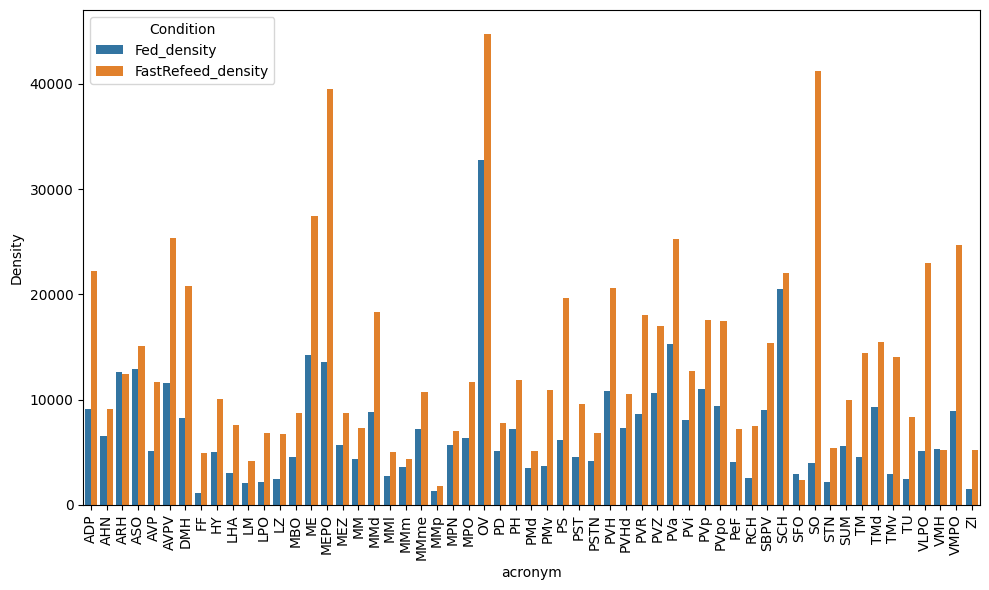

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load the JSON file
with open('structures.json', 'r') as f:
    data = json.load(f)

# Create a list of structures that are contained within 'HY'
hy_structures = [item['acronym'] for item in data if 'HY' in [i['acronym'] for i in data if i['id'] in item['structure_id_path']]]

# Read the CSV files
df1 = pd.read_csv('Fed.csv')
df2 = pd.read_csv('FastRefeed.csv')

# Filter the dataframes to include only structures that are in the HY list
df1 = df1[df1['acronym'].isin(hy_structures)]
df2 = df2[df2['acronym'].isin(hy_structures)]

# Rename the 'density' column to make it more descriptive
df1 = df1.rename(columns={'density (cells/mm^3)': 'Fed_density'})
df2 = df2.rename(columns={'density (cells/mm^3)': 'FastRefeed_density'})

# Merge the two dataframes
df = pd.merge(df1, df2, on=['acronym', 'name'], how='outer')

# Reshape to long format
df_long = df.melt(id_vars=['acronym', 'name'], value_vars=['Fed_density', 'FastRefeed_density'], var_name='Condition', value_name='Density')

# Plot the densities side by side
plt.figure(figsize=(10,6))
sns.barplot(data=df_long, x='acronym', y='Density', hue='Condition')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [25]:
!pip install --upgrade ipywidgets


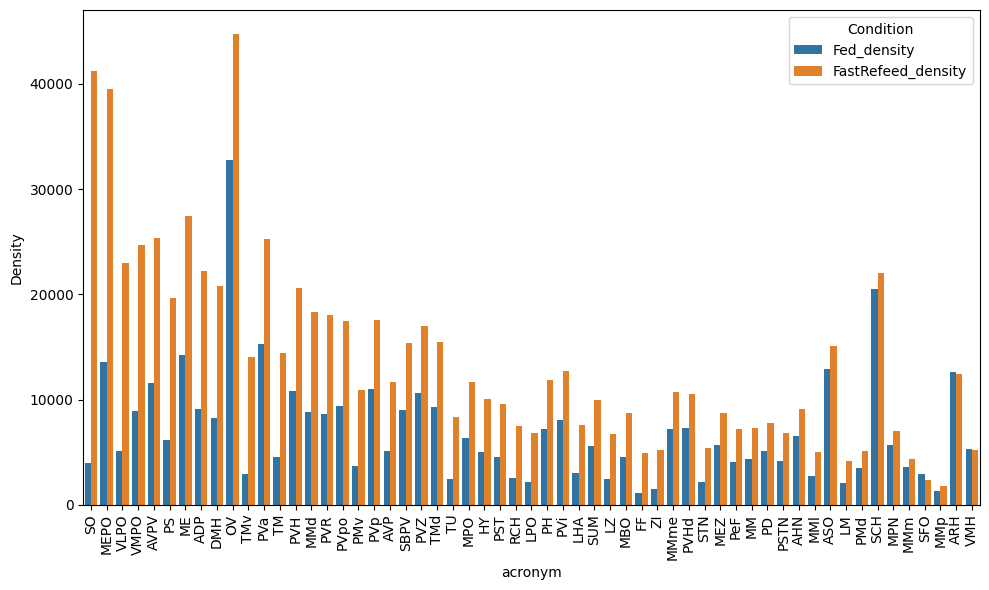

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load the JSON file
with open('structures.json', 'r') as f:
    data = json.load(f)

# Create a list of structures that are contained within 'HY'
hy_structures = [item['acronym'] for item in data if 'HY' in [i['acronym'] for i in data if i['id'] in item['structure_id_path']]]

# Read the CSV files
df1 = pd.read_csv('Fed.csv')
df2 = pd.read_csv('FastRefeed.csv')

# Filter the dataframes to include only structures that are in the HY list
df1 = df1[df1['acronym'].isin(hy_structures)]
df2 = df2[df2['acronym'].isin(hy_structures)]

# Rename the 'density' column to make it more descriptive
df1 = df1.rename(columns={'density (cells/mm^3)': 'Fed_density'})
df2 = df2.rename(columns={'density (cells/mm^3)': 'FastRefeed_density'})

# Merge the two dataframes
df = pd.merge(df1, df2, on=['acronym', 'name'], how='outer')

# Calculate difference in density between the two conditions
df['Density_diff'] = abs(df['Fed_density'] - df['FastRefeed_density'])

# Sort dataframe by difference in density
df = df.sort_values('Density_diff', ascending=False)

# Reshape to long format
df_long = df.melt(id_vars=['acronym', 'name'], value_vars=['Fed_density', 'FastRefeed_density'], var_name='Condition', value_name='Density')

# Plot the densities side by side
plt.figure(figsize=(10,6))
sns.barplot(data=df_long, x='acronym', y='Density', hue='Condition')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [27]:
!pip install seaborn


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


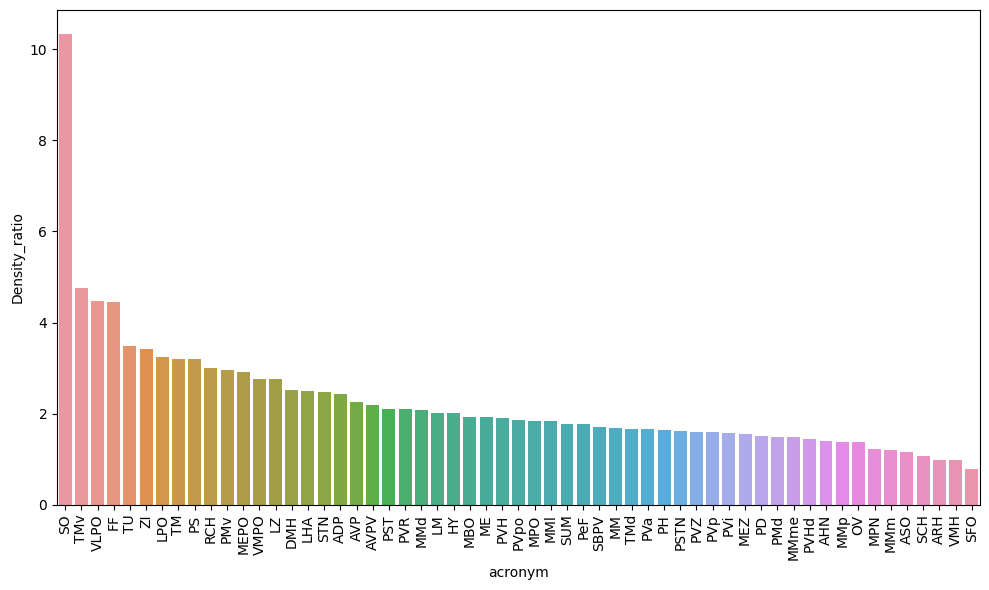

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

# Load the JSON file
with open('structures.json', 'r') as f:
    data = json.load(f)

# Create a list of structures that are contained within 'HY'
hy_structures = [item['acronym'] for item in data if 'HY' in [i['acronym'] for i in data if i['id'] in item['structure_id_path']]]

# Read the CSV files
df1 = pd.read_csv('Fed.csv')
df2 = pd.read_csv('FastRefeed.csv')

# Filter the dataframes to include only structures that are in the HY list
df1 = df1[df1['acronym'].isin(hy_structures)]
df2 = df2[df2['acronym'].isin(hy_structures)]

# Rename the 'density' column to make it more descriptive
df1 = df1.rename(columns={'density (cells/mm^3)': 'Fed_density'})
df2 = df2.rename(columns={'density (cells/mm^3)': 'FastRefeed_density'})

# Merge the two dataframes
df = pd.merge(df1, df2, on=['acronym', 'name'], how='outer')

# Calculate ratio of densities between the two conditions
df['Density_ratio'] = df['FastRefeed_density'] / df['Fed_density']

# Remove infinite or NaN values
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Density_ratio"], how="all")

# Sort dataframe by ratio
df = df.sort_values('Density_ratio', ascending=False)

# Plot the ratio
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='acronym', y='Density_ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


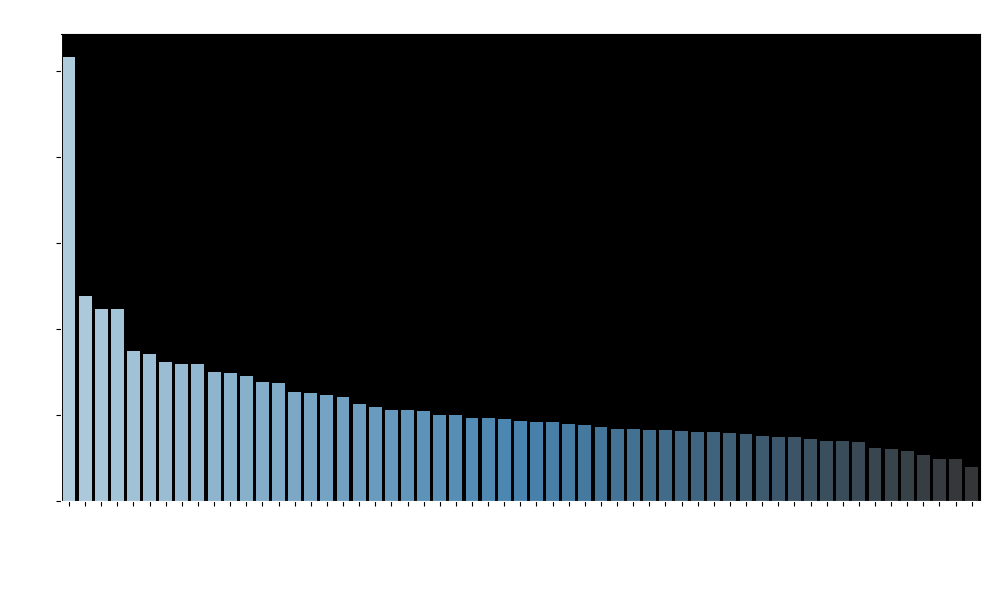

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load the JSON file
with open('structures.json', 'r') as f:
    data = json.load(f)

# Create a list of structures that are contained within 'HY'
hy_structures = [item['acronym'] for item in data if 'HY' in [i['acronym'] for i in data if i['id'] in item['structure_id_path']]]

# Read the CSV files
df1 = pd.read_csv('Fed.csv')
df2 = pd.read_csv('FastRefeed.csv')

# Filter the dataframes to include only structures that are in the HY list
df1 = df1[df1['acronym'].isin(hy_structures)]
df2 = df2[df2['acronym'].isin(hy_structures)]

# Rename the 'density' column to make it more descriptive
df1 = df1.rename(columns={'density (cells/mm^3)': 'Fed_density'})
df2 = df2.rename(columns={'density (cells/mm^3)': 'FastRefeed_density'})

# Merge the two dataframes
df = pd.merge(df1, df2, on=['acronym', 'name'], how='outer')

# Calculate ratio of densities between the two conditions
df['Density_ratio'] = df['FastRefeed_density'] / df['Fed_density']

# Remove infinite or NaN values
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Density_ratio"], how="all")

# Sort dataframe by ratio
df = df.sort_values('Density_ratio', ascending=False)

# Plot the ratio
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='acronym', y='Density_ratio', palette="Blues_d")
plt.title('Density Ratio between FastRefeed and Fed States', fontsize=16, color='white')
plt.xlabel('Acronym', fontsize=12)
plt.ylabel('Density Ratio', fontsize=12)
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().title.set_color('white')
plt.grid(False)
plt.gca().set_facecolor('black')
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import json
import numpy as np
import plotly.graph_objects as go
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def plot_graph():
    # Read both datasets
    df1 = pd.read_csv('Fed.csv')
    df2 = pd.read_csv('FastRefeed.csv')

    # Rename the density column in both datasets for clarity
    df1.rename(columns={'density (cells/mm^3)': 'density_Fed'}, inplace=True)
    df2.rename(columns={'density (cells/mm^3)': 'density_FastRefeed'}, inplace=True)

    # Merge the two datasets on 'acronym' column
    df = pd.merge(df1, df2, on='acronym', how='outer')  # 'outer' ensures that all acronyms from both datasets are included

    # Calculate the ratio
    df['density_ratio'] = df['density_FastRefeed'] / df['density_Fed']

    # Handle any potential division by zero or infinity
    df['density_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

    # Load the JSON file
    with open('structures.json', 'r') as f:
        data = json.load(f)

    # Prepare data for the tree
    labels = [item['acronym'] for item in data if item['acronym'] in df['acronym'].values]
    parents = ['' if len(item['structure_id_path']) == 1 else next((i['acronym'] for i in data if i['id'] == item['structure_id_path'][-2])) for item in data if item['acronym'] in df['acronym'].values]

    # Match acronyms with ratio values from the merged DataFrame
    ratios = [df.loc[df['acronym'] == acronym, 'density_ratio'].iloc[0] for acronym in labels]

    colors = ['rgb{}'.format(tuple(item['rgb_triplet'])) for item in data if item['acronym'] in df['acronym'].values]

    # Create a Plotly figure
    fig = go.Figure(go.Sunburst(
        labels=labels,
        parents=parents,
        values=ratios,
        marker=dict(colors=colors),
        hovertemplate='<b>%{label}</b><br>Density Ratio (FastRefeed/Fed): %{value}<extra></extra>',  # Customize hover text
    ))

    fig.update_layout(
        margin=dict(t=0, l=0, r=0, b=0),
        plot_bgcolor='black',
        paper_bgcolor='black'
    )

    graph_html = fig.to_html(full_html=False, include_plotlyjs='cdn')

    return render_template('graph.html', graph_html=graph_html)

if __name__ == '__main__':
    app.run()


In [14]:
!pip install dash-tools --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.8/518.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 565.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.7/280.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.6/191.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
dashtools gui


SyntaxError: invalid syntax (872001214.py, line 1)

In [2]:
dashtools init MyApp

SyntaxError: invalid syntax (2219211820.py, line 1)

In [3]:
import dash

In [4]:
import dashtools

In [5]:
dashtools init MyApp

SyntaxError: invalid syntax (2219211820.py, line 1)

In [6]:
!pip install dash

In [1]:
import dash
import dashtools

SyntaxError: invalid syntax (3691366148.py, line 1)

In [12]:
import plotly.io as pio
pio.write_html(fig,
file='index2.html',
auto_open=True)

In [4]:
import pandas as pd
import json
import numpy as np
import plotly.graph_objects as go

# Read both datasets
df1 = pd.read_csv('Fed.csv')
df2 = pd.read_csv('FastRefeed.csv')

# Rename the density column in both datasets for clarity
df1.rename(columns={'density (cells/mm^3)': 'density_Fed'}, inplace=True)
df2.rename(columns={'density (cells/mm^3)': 'density_FastRefeed'}, inplace=True)

# Merge the two datasets on 'acronym' column
df = pd.merge(df1, df2, on='acronym', how='outer')  # 'outer' ensures that all acronyms from both datasets are included

# Calculate the ratio
df['density_ratio'] = df['density_FastRefeed'] / df['density_Fed']

# Handle any potential division by zero or infinity
df['density_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Load the JSON file
with open('structures.json', 'r') as f:
    data = json.load(f)

# Prepare data for the tree
labels = [item['acronym'] for item in data if item['acronym'] in df['acronym'].values]
parents = ['' if len(item['structure_id_path']) == 1 else next((i['acronym'] for i in data if i['id'] == item['structure_id_path'][-2])) for item in data if item['acronym'] in df['acronym'].values]

# Match acronyms with ratio values from the merged DataFrame
ratios = [df.loc[df['acronym'] == acronym, 'density_ratio'].iloc[0] for acronym in labels]

# Create a dictionary to map acronyms to names
acronym_to_name = {item['acronym']: item['name'] for item in data if item['acronym'] in df['acronym'].values}

# Create a list of hover texts with the 'name' and 'ratio'
hover_texts = [f"<b>{acronym}</b><br>Name: {acronym_to_name[acronym]}<br>Density Ratio (FastRefeed/Fed): {ratio}" for acronym, ratio in zip(labels, ratios)]

colors = ['rgb{}'.format(tuple(item['rgb_triplet'])) for item in data if item['acronym'] in df['acronym'].values]

# Create a Plotly figure
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=ratios,
    marker=dict(colors=colors),
    hovertext=hover_texts,
))

fig.update_layout(
    margin=dict(t=0, l=0, r=0, b=0),
    plot_bgcolor='black',
    paper_bgcolor='black'
)

fig.show()


In [11]:
import pandas as pd
import json
import numpy as np
import plotly.graph_objects as go

# Read both datasets
df1 = pd.read_csv('Fed.csv')
df2 = pd.read_csv('FastRefeed.csv')

# Rename the density column in both datasets for clarity
df1.rename(columns={'density (cells/mm^3)': 'density_Fed'}, inplace=True)
df2.rename(columns={'density (cells/mm^3)': 'density_FastRefeed'}, inplace=True)

# Merge the two datasets on 'acronym' column
df = pd.merge(df1, df2, on='acronym', how='outer')  # 'outer' ensures that all acronyms from both datasets are included

# Calculate the ratio
df['density_ratio'] = df['density_FastRefeed'] / df['density_Fed']

# Handle any potential division by zero or infinity
df['density_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Load the JSON file
with open('structures.json', 'r') as f:
    data = json.load(f)

# Prepare data for the tree
labels = [item['acronym'] for item in data if item['acronym'] in df['acronym'].values]
parents = ['' if len(item['structure_id_path']) == 1 else next((i['acronym'] for i in data if i['id'] == item['structure_id_path'][-2])) for item in data if item['acronym'] in df['acronym'].values]

# Match acronyms with ratio values from the merged DataFrame
ratios = [df.loc[df['acronym'] == acronym, 'density_ratio'].iloc[0] for acronym in labels]

# Create a dictionary to map acronyms to names
acronym_to_name = {item['acronym']: item['name'] for item in data if item['acronym'] in df['acronym'].values}

# Create a list of hover texts with the 'name' and formatted 'ratio'
hover_texts = [
    f"<b>{acronym}</b><br>{acronym_to_name[acronym]}<br>Density Ratio (FastRefeed/Fed): <b>{ratio:.3f}</b>"
    for acronym, ratio in zip(labels, ratios)
]

colors = ['rgb{}'.format(tuple(item['rgb_triplet'])) for item in data if item['acronym'] in df['acronym'].values]

# Create a Plotly figure
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=ratios,
    marker=dict(colors=colors),
    hovertext=hover_texts,
    hovertemplate='%{hovertext}<extra></extra>'  # Set the hover template to only display the custom hover text
))

fig.update_layout(
    margin=dict(t=20, l=0, r=0, b=20),
    plot_bgcolor='black',
    paper_bgcolor='black'
)

fig.show()


In [15]:
import pandas as pd
import json
import plotly.graph_objects as go

# Read both datasets
df1 = pd.read_csv('Fed.csv')
df2 = pd.read_csv('FastRefeed.csv')

# Rename the density column in both datasets for clarity
df1.rename(columns={'density (cells/mm^3)': 'density_Fed'}, inplace=True)
df2.rename(columns={'density (cells/mm^3)': 'density_FastRefeed'}, inplace=True)

# Merge the two datasets on 'acronym' column
df = pd.merge(df1, df2, on='acronym', how='outer')  # 'outer' ensures that all acronyms from both datasets are included

# Calculate the ratio
df['density_ratio'] = df['density_FastRefeed'] / df['density_Fed']

# Handle any potential division by zero or infinity
df['density_ratio'].replace([float('inf'), float('-inf')], np.nan, inplace=True)

# Load the JSON file
with open('structures.json', 'r') as f:
    data = json.load(f)

# Create a DataFrame with relevant data
df_data = pd.DataFrame([item for item in data if item['acronym'] in df['acronym'].values])

# Convert DataFrame to a list of dictionaries
df_data_dict = df_data.to_dict('records')

# Create a dictionary to map acronyms to names
acronym_to_name = {item['acronym']: item['name'] for item in df_data_dict}

# Create a hover text column with the formatted information
df_data['hovertext'] = (
    "<b>" + df_data['acronym'] + "</b><br>" +
    df_data['name'] + "<br>" +
    "Density Ratio (FastRefeed/Fed): <b>{:.3f}</b>".format(df_data['density_ratio'])
)

# Create a Plotly figure
fig = go.Figure(go.Sunburst(
    labels=df_data['acronym'],
    parents=df_data['parent_structure_id'],
    values=df_data['density_ratio'],
    marker=dict(colors=df_data['rgb_triplet']),
    hovertext=df_data['hovertext'],
    hovertemplate='%{hovertext}<extra></extra>'  # Set the hover template to only display the custom hover text
))

fig.update_layout(
    margin=dict(t=20, l=0, r=0, b=20),
    plot_bgcolor='black',
    paper_bgcolor='black'
)

fig.show()


KeyError: 'density_ratio'